<a href="https://colab.research.google.com/github/mvadrev/Emulation/blob/main/Exploratory_data_analysis_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
# Install huggin face datasets lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datasets import load_dataset
# Download dataset
dataset = load_dataset("julien-c/titanic-survival")

  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
dataset['train']
# View dataset 

Dataset({
    features: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'],
    num_rows: 887
})

In [4]:
data = dataset['train']
# Check type of dataset
type(dataset['train'])

datasets.arrow_dataset.Dataset

In [5]:
# Import my favority data analysis package
import pandas as pd
# Convert dict to pandas
dataframe = pd.DataFrame(data)
# Print first few entries
dataframe.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
dataframe.info()
# The info method conveniently lets us what is the count of each column in terms of rows
# Here we can see all our columns are uniform. There are no missing values or null objects so we are good
# We dont have to impute any missing values with the mean for example any null values
# Next step is normalization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


The titanic dataset is a great example of the data analysis pipeline usually followed by datascientists i.e data cleanup, normalization, replacement of null values

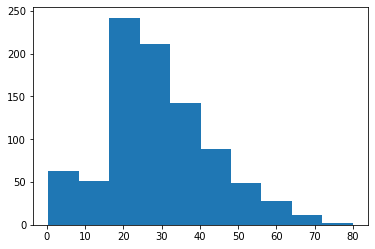

In [7]:
# before we preprocess the age for training, we can explore the range of ages and their counts to get an idea of how many adults vs how many children
import matplotlib.pyplot as plt

ages = dataframe['Age']
plt.hist(ages)
plt.show() 
# Lets plot the age frequency distributin first

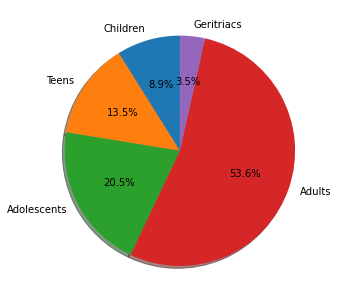

In [8]:
df_children = dataframe['Age'].between(0, 12)
df_teens = dataframe['Age'].between(13, 19)
df_young_adults = dataframe['Age'].between(20, 25)
df_adults = dataframe['Age'].between(26, 59)
df_geriatrics = dataframe['Age'].between(60, 100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Children', 'Teens', 'Adolescents', 'Adults', "Geritriacs"]
values = [df_children.value_counts()[1], df_teens.value_counts()[1], df_young_adults.value_counts()[1], df_adults.value_counts()[1], df_geriatrics.value_counts()[1]]
ax.pie(values, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()
# Therefore we can conclude mostly adults aged between 26 - 59 were majority passengers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:

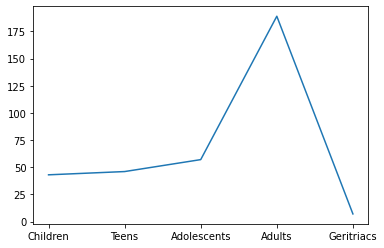

In [9]:
%matplotlib inline
df_Notsurvived_filter = dataframe['Survived'] == 1
subset_Notsurviced = dataframe[df_Notsurvived_filter]
ax2 = fig.add_axes([0,0,1,1])

# Get count children who did not make it
subset_children_Notsurvived = subset_Notsurviced[df_children]

# Get count children who did not make it
subset_teens_Notsurvived = subset_Notsurviced[df_teens]

# Get count youngAdults who did not make it
subset_youngAdults_Notsurvived = subset_Notsurviced[df_young_adults]

# Get count Adults who did not make it
subset_Adults_Notsurvived = subset_Notsurviced[df_adults]

# Get count geriatrics who did not make it
subset_geriatrics_Notsurvived = subset_Notsurviced[df_geriatrics]
labels = ['Children', 'Teens', 'Adolescents', 'Adults', "Geritriacs"]
values = [len(subset_children_Notsurvived), len(subset_teens_Notsurvived), len(subset_youngAdults_Notsurvived),len(subset_Adults_Notsurvived),len(subset_geriatrics_Notsurvived)]
plt.plot(labels, values)
plt.show()

# We can conclude no old people died
# Majority of the people who died are young adults and few children, adolescents and teens

In [10]:
#Preprocess data - This is a part of data post analysis routine. 
# Machine learning models and deep learning models perform better when the data is normalized between 0 and 1. 
# This is because multiplying small numbers is computationally more feasable and it it easier for the model to converge like this

# We start by mean normalizing all features that can be normalized 

# We start with Age
# Get mean of all ages of dataset from all rows
avgAge = dataframe['Age'].mean()
print("The mean age is", avgAge)

# We do not have any null values. But to illustrate, if we have any na value for age it is incorrect as nobody can have an age of na. Its always > 0 
# Still for illustration, I am showing how to fill na values with mean age 
dataframe['Age'] = dataframe['Age'].fillna(avgAge)
dataframe.info()


The mean age is 29.471443066516347
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [11]:
# After checking for NA values in age as above, we need to finally normalize all ages with mean age
dataframe['Age'] = dataframe['Age']/dataframe['Age'].mean()
# We want to print first 10 records in age to check if age is normalized
dataframe['Age'][:10]

0    0.746485
1    1.289384
2    0.882210
3    1.187590
4    1.187590
5    0.916141
6    1.832282
7    0.067862
8    0.916141
9    0.475036
Name: Age, dtype: float64

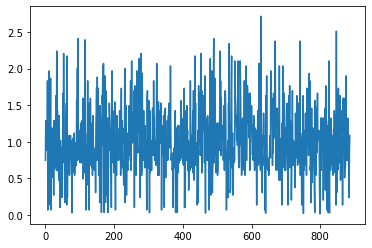

In [12]:
import matplotlib.pyplot as plt
import numpy as np
y = dataframe['Age']
x = np.arange(len(dataframe['Age']))
plt.plot(x,y)
plt.show()
# We can visualize the age and verify it been truly normalized

In [13]:
# Similarly we now normalize the fare 
dataframe['Fare'] = dataframe['Fare']/(dataframe['Fare'].mean())
# Print first 10 records of fare to check
dataframe['Fare'][:10]

0    0.224421
1    2.206543
2    0.245315
3    1.643687
4    0.249184
5    0.261823
6    1.605381
7    0.652367
8    0.344626
9    0.930828
Name: Fare, dtype: float64

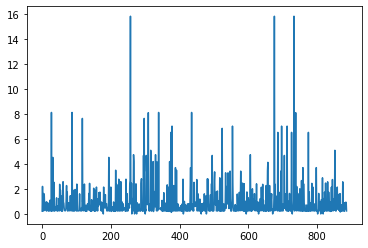

In [14]:
y = dataframe['Fare']
x = np.arange(len(dataframe['Fare']))
plt.plot(x,y)
plt.show()
# We can visualize the age and verify it been truly normalized

In [15]:
# Next we need to dela with col: sex. Machine learning models are mathematical models and need to be converted from norminal attributes to numeric attributes
# In our dataset, we have labels {m, f} and we want to impute al m with 0 and female with 1
# We can use the map function to achieve this
# dataframe['Sex'] = dataframe['Sex'].map({'male': 0, 'female': 1})
dataframe=dataframe.replace(to_replace="male",value=0)
dataframe=dataframe.replace(to_replace="female",value=1)

dataframe

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,0.746485,1,0,0.224421
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,1.289384,1,0,2.206543
2,1,3,Miss. Laina Heikkinen,1,0.882210,0,0,0.245315
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1.187590,1,0,1.643687
4,0,3,Mr. William Henry Allen,0,1.187590,0,0,0.249184
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,0,0.916141,0,0,0.402409
883,1,1,Miss. Margaret Edith Graham,1,0.644692,0,0,0.928637
884,0,3,Miss. Catherine Helen Johnston,1,0.237518,1,2,0.725884
885,1,1,Mr. Karl Howell Behr,0,0.882210,0,0,0.928637


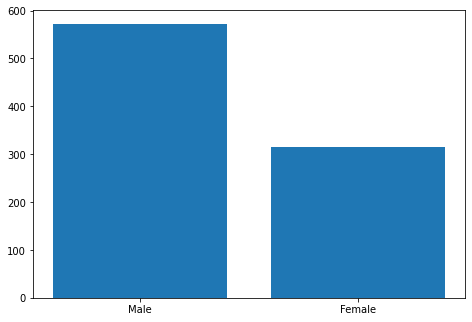

In [16]:
# Lets also see while we are here the frequency of each gender as more number of a particular class may cause class imbalance

Males = (dataframe['Sex'] == 0).sum()
Females = (dataframe['Sex'] == 1).sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Male', 'Female']
values = [Males, Females]
ax.bar(labels,values)
plt.show()

# From the results we can be sure that the number of males and females is defiitely not equal 
# This can surely cause imbalance. It is on the ML researcher to figure out how bad it is
# And if we have to apply majority undersampling or minority over sampling 

In [17]:
# ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'],
dataframe['Parents/Children Aboard']

0      0
1      0
2      0
3      0
4      0
      ..
882    0
883    0
884    2
885    0
886    0
Name: Parents/Children Aboard, Length: 887, dtype: int64

In [18]:
# We also have a column called name
# We also have 'Siblings/Spouses Aboard', 'Parents/Children Aboard'- but these are already number and i correct range
# Since name is not very useful in predicting if a person survived or not, we could probably just eliminate it for training
# But since the task is a exploratory data analysis task, we cab leave it be for now as we are not training 

# but for illustration purposes, we can remove the name col and get the cleaned dataset in the following way 
cleanedDataset = dataframe[['Pclass', 'Sex', 'Age', 'Fare', 'Survived', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']]
cleanedDataset


,Pclass,Sex,Age,Fare,Survived,Siblings/Spouses Aboard,Parents/Children Aboard
0,3,0,0.746485,0.224421,0,1,0
1,1,1,1.289384,2.206543,1,1,0
2,3,1,0.882210,0.245315,1,0,0
3,1,1,1.187590,1.643687,1,1,0
4,3,0,1.187590,0.249184,0,0,0
...,...,...,...,...,...,...,...
882,2,0,0.916141,0.402409,0,0,0
883,1,1,0.644692,0.928637,1,0,0
884,3,1,0.237518,0.725884,0,1,2
885,1,0,0.882210,0.928637,1,0,0


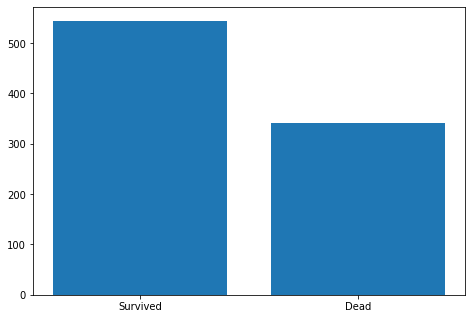

In [19]:
# We also can verify if there is any class imbalnce in the final labels i.e survived or not

survived = (dataframe['Survived'] == 0).sum()
dead = (dataframe['Survived'] == 1).sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Survived', 'Dead']
values = [survived, dead]
ax.bar(labels,values)
plt.show()

# Again this is likely to cause class imbalance. If the model performs bad, 
# then we may have to undersample the majority or minorityover smapling to fine tune the results

In [20]:
# We can also check how many 'Siblings/Spouses Aboard', 'Parents/Children Aboard' survived or passed away
# All this depends on the context the dataset it being analysed for
# For example if we want to kno how man paassengers with Siblings/Spouses survived then we can take this our
# Othereise we dont have to. All depends on context of problem statement given by stakeholder at workplace 

# Lets try for fun how to get how many passengers with siblings/spouse survived 

hasSpouseOrSibling = dataframe['Siblings/Spouses Aboard'] == 1 
dataframe[hasSpouseOrSibling]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,0.746485,1,0,0.224421
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,1.289384,1,0,2.206543
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1.187590,1,0,1.643687
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,1,0.475036,1,0,0.930828
10,1,3,Miss. Marguerite Rut Sandstrom,1,0.135725,1,1,0.516941
...,...,...,...,...,...,...,...,...
862,1,2,Miss. Asuncion Duran y More,1,0.916141,1,0,0.428978
865,1,3,Master. Harold Theodor Johnson,0,0.135725,1,1,0.344626
867,1,1,Mrs. Richard Leonard (Sallie Monypeny) Beckwith,1,1.594764,1,1,1.626792
870,1,2,Mrs. Samuel (Hannah Wizosky) Abelson,1,0.950072,1,0,0.742909


In [21]:
# we can also use pandas inbuilt profiling tool to autogenrate a html view 

!pip uninstall pandas-profiling
!pip install pandas-profiling==3.4.0
from pandas_profiling import ProfileReport

report = ProfileReport(dataframe)
report



Found existing installation: pandas-profiling 3.4.0
Uninstalling pandas-profiling-3.4.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-3.4.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-3.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.4.0-py2.py3-none-any.whl (315 kB)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]